Análises estatísticas e Gráficos

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck as pdk
import plotly.express as px

In [54]:
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.titlesize'] = 14

In [55]:
path_df = "../data/processed/dataset_not_null_features_removed_outliers"

In [56]:
df = pd.read_csv(path_df)

In [57]:
df['started_at'] = pd.to_datetime(df['started_at'] , format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'] , format='%Y-%m-%d %H:%M:%S')

In [58]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,round_trip,ride_duration,ride_duration_minutes,week_day,is_weekend,hour_start,hour_end,distance_km,distance_m
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Lincoln Ave,141.0,41.932588,-87.636427,...,member,different_place,0 days 00:09:37,9.616667,Thursday,False,18,18,1.885153,1885.152542
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168.0,Michigan Ave & 14th St,168.0,41.864379,-87.623681,...,casual,same_place,0 days 01:08:47,68.783333,Thursday,False,18,19,0.026647,26.647146
2,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.902989,-87.683767,...,casual,same_place,0 days 00:10:47,10.783333,Thursday,False,16,16,0.006598,6.597641
3,56349A5A42F0AE51,electric_bike,2020-08-27 17:26:23,2020-08-27 18:07:50,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.903015,-87.683731,...,casual,same_place,0 days 00:41:27,41.450000,Thursday,False,17,18,0.012079,12.079038
4,EB6ABC5570C29B22,electric_bike,2020-08-26 20:14:02,2020-08-26 20:34:00,Cityfront Plaza Dr & Pioneer Ct,196.0,Dearborn St & Monroe St,49.0,41.890326,-87.621700,...,casual,different_place,0 days 00:19:58,19.966667,Wednesday,False,20,20,1.250438,1250.438215


## Análise Estatíticas

In [59]:
def analise_estatistica_completa(df):
    print("=== 📊 SUMMARY ===")
    print(f"Lines: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}\n")

    # 1. Verifing null values
    print("=== 🔍 NULL VALUES ===")
    nulls = df.isnull().sum()
    print(nulls[nulls > 0] if nulls.any() else "Any null value founded.", "\n")

    # 2. Numerical Variables Analysis
    # (distance, duration, hours)
    cols_num = ['ride_duration_minutes', 'distance_km', 'distance_m', 'hour_start', 'hour_end']
    print("=== 📈 NUMERICAL STATISTICS ===")
    resumo_num = df[cols_num].describe().T
    # Adding median
    resumo_num['median'] = df[cols_num].median()
    print(resumo_num[['count', 'mean', 'std', 'min', 'median', 'max']], "\n")

    # 3. Categorical Variable Analysis
    cols_cat = ['rideable_type', 'member_casual', 'start_station_name', 'end_station_name', 'week_day','round_trip']
    print("=== 🔠 CATEGORICAL ANALYSIS (Top 5 Values) ===")
    for col in cols_cat:
        top_values = df[col].value_counts().head(5)
        percent = (top_values / len(df) * 100).round(2)
        print(f"Column: {col}")
        for val, count in top_values.items():
            print(f"  - {val}: {count} ({percent[val]}%)")
    print("")

    # 4. Bools Variable Analysis
    cols_bool = ['is_weekend']
    print("=== 🚩 BOOLS DISTRIBUTION ===")
    for col in cols_bool:
        dist = df[col].value_counts(normalize=True) * 100
        print(f"{col}: {dist.get(True, 0):.2f}% Sim | {dist.get(False, 0):.2f}% Não")
    print("")

    # 5. Simple Detection Outliers (Using IQR for distance and time)
    print("=== 🚨 OUTLIERS (IQR) ===")
    for col in ['ride_duration_minutes', 'distance_km']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[df[col] > limite_superior].shape[0]
        print(f"{col}: {outliers} lines above {limite_superior:.2f} (Superior Limit)")
    print("")

In [60]:
analise_estatistica_completa(df)

=== 📊 SUMMARY ===
Lines: 523479
Columns: 22

=== 🔍 NULL VALUES ===
distance_km    835
distance_m     835
dtype: int64 

=== 📈 NUMERICAL STATISTICS ===
                          count         mean          std  min       median  \
ride_duration_minutes  523479.0    18.910544    17.133092  0.0    14.516667   
distance_km            522644.0     1.957801     1.502788  0.0     1.647392   
distance_m             522644.0  1957.801116  1502.788477  0.0  1647.391624   
hour_start             523479.0    14.427033     4.707213  0.0    15.000000   
hour_end               523479.0    14.607335     4.802208  0.0    15.000000   

                               max  
ride_duration_minutes   147.000000  
distance_km               6.759760  
distance_m             6759.759605  
hour_start               23.000000  
hour_end                 23.000000   

=== 🔠 CATEGORICAL ANALYSIS (Top 5 Values) ===
Column: rideable_type
  - docked_bike: 477087 (91.14%)
  - electric_bike: 46392 (8.86%)
Column: member_c

insights:
1) docked_bike é maioria nos dados
2) Existe uma distribuição (não muito grande) entre usuários do tipo member e casua , cerca de 15%
3) As top 5 estações de coleta são as mesmas (e em mesma ordem) das estações de entrega
4) Sexta , Sábado e Domingo são 50% de todo o uso das bicicletas
5) A maior parte do usuários pega a bicicleta em um lugar e deixa em outro

In [61]:
def insights(df):
    # 1. Business Insight: round_trip and duration/distance
    print("\n🎯 INSIGHT: BEHAVIOR FOR ROUND TRIP (Mean):")
    insight_trip = df.groupby('round_trip')[['ride_duration_minutes']].mean().round(2)
    print(insight_trip)
    print("")

    insight_trip = df[df['distance_m'] > 10].groupby('round_trip')[[ 'distance_km']].mean().round(2)
    print(insight_trip)
    print("")

    # 2. Business Insight: round_trip and duration/distance
    print("\n🎯 INSIGHT: MEMBER FOR ROUND TRIP (Mean):")
    insight_trip = df.groupby('member_casual')[['ride_duration_minutes']].mean().round(2)
    print(insight_trip)
    print("")

    insight_trip = df[df['distance_m'] > 10].groupby('member_casual')[['distance_km']].mean().round(2)
    print(insight_trip)
    print("")

    # 3. Business Insight: How much of our clients goes to the same place at end
    print("\n🎯 INSIGHT: BEHAVIOR FOR RIDE DURANTION (Mean):")
    insight_trip = df.groupby('rideable_type')[['ride_duration_minutes']].mean().round(2)
    print(insight_trip)
    print("")

    insight_trip = df[df['distance_m'] > 10].groupby('rideable_type')[['distance_km']].mean().round(2)
    print(insight_trip)
    print("")
    

In [62]:
insights(df)


🎯 INSIGHT: BEHAVIOR FOR ROUND TRIP (Mean):
                 ride_duration_minutes
round_trip                            
different_place                  16.04
same_place                       39.42

                 distance_km
round_trip                  
different_place         2.21
same_place              2.31


🎯 INSIGHT: MEMBER FOR ROUND TRIP (Mean):
               ride_duration_minutes
member_casual                       
casual                         24.46
member                         14.74

               distance_km
member_casual             
casual                2.24
member                2.21


🎯 INSIGHT: BEHAVIOR FOR RIDE DURANTION (Mean):
               ride_duration_minutes
rideable_type                       
docked_bike                    19.19
electric_bike                  16.04

               distance_km
rideable_type             
docked_bike           2.22
electric_bike         2.25



Insights:
1) Usuários que pegam a bicicleta em um lugar e entregam em outro utilizam durante menos tempo. Será que isso tem a ver com a ideia de que as pessoas simplesmente usam para andar pela cidade a vontade , por isso passam mais tempo?
2) Usuários que são "member" também utilizam por mais tempo médio
3) O tempo de uso da bicicleta não muda tanto mediante o tipo de bicicleta que está sendo usada
4) De forma geral , a distância percorrida é sempre muito parecida em todos os casos

## Análise visual Geral

In [63]:
def plot_distributions_and_volume(df):
    """Foco em preferências de uso e volume horário/rotas com destaque para fins de semana."""
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Preferência de Bicicleta por Tipo de Membro
    sns.countplot(data=df, x='member_casual', hue='rideable_type', ax=axes[0, 0])
    axes[0, 0].set_title('Preferência de Bicicleta por Tipo de Membro')
    
    # 2. Volume de Corridas por Hora do Dia
    hourly = df.groupby(['hour_start', 'member_casual']).size().reset_index(name='counts')
    sns.lineplot(data=hourly, x='hour_start', y='counts', hue='member_casual', marker='o', ax=axes[0, 1])
    axes[0, 1].set_title('Demanda Horária (Membros vs Casuais)')
    axes[0, 1].set_xticks(range(24))

    # 3. Viagens de Ida e Volta vs Ponto a Ponto
    sns.countplot(data=df, x='round_trip', hue='member_casual', ax=axes[1, 0])
    axes[1, 0].set_title('Tipo de Trajeto (Round Trip vs Different Place)')

    # 4. Quantidade de corridas ao longo do mês com destaque para FDS
    # Garantimos que a coluna 'day' existe para o agrupamento
    df['day'] = df['started_at'].dt.day
    daily_volume = df.groupby('day').size()
    
    # Plot da linha
    sns.lineplot(x=daily_volume.index, y=daily_volume.values, ax=axes[1, 1], color='darkred', linewidth=3, marker='o')
    
    # Lógica para destacar os Fins de Semana
    # Pegamos os números dos dias que são fim de semana no seu DF
    fds_days = df[df['is_weekend'] == True]['day'].unique()
    
    for day in fds_days:
        # Criamos uma sombra cinza clara atrás de cada dia de folga
        axes[1, 1].axvspan(day - 0.5, day + 0.5, color='gray', alpha=0.2, label='Fim de Semana' if day == fds_days[0] else "")

    axes[1, 1].set_title('Volume Total de Corridas ao Longo do Mês (Sombra = FDS)')
    axes[1, 1].set_xlabel('Dia do Mês')
    axes[1, 1].set_xticks(range(1, 32)) # Garante que todos os dias apareçam no eixo X
    
    # Adiciona a legenda para explicar a sombra, se houver
    if len(fds_days) > 0:
        axes[1, 1].legend()

    df.drop(columns=["day"] , inplace=True)

    plt.tight_layout()
    plt.show()

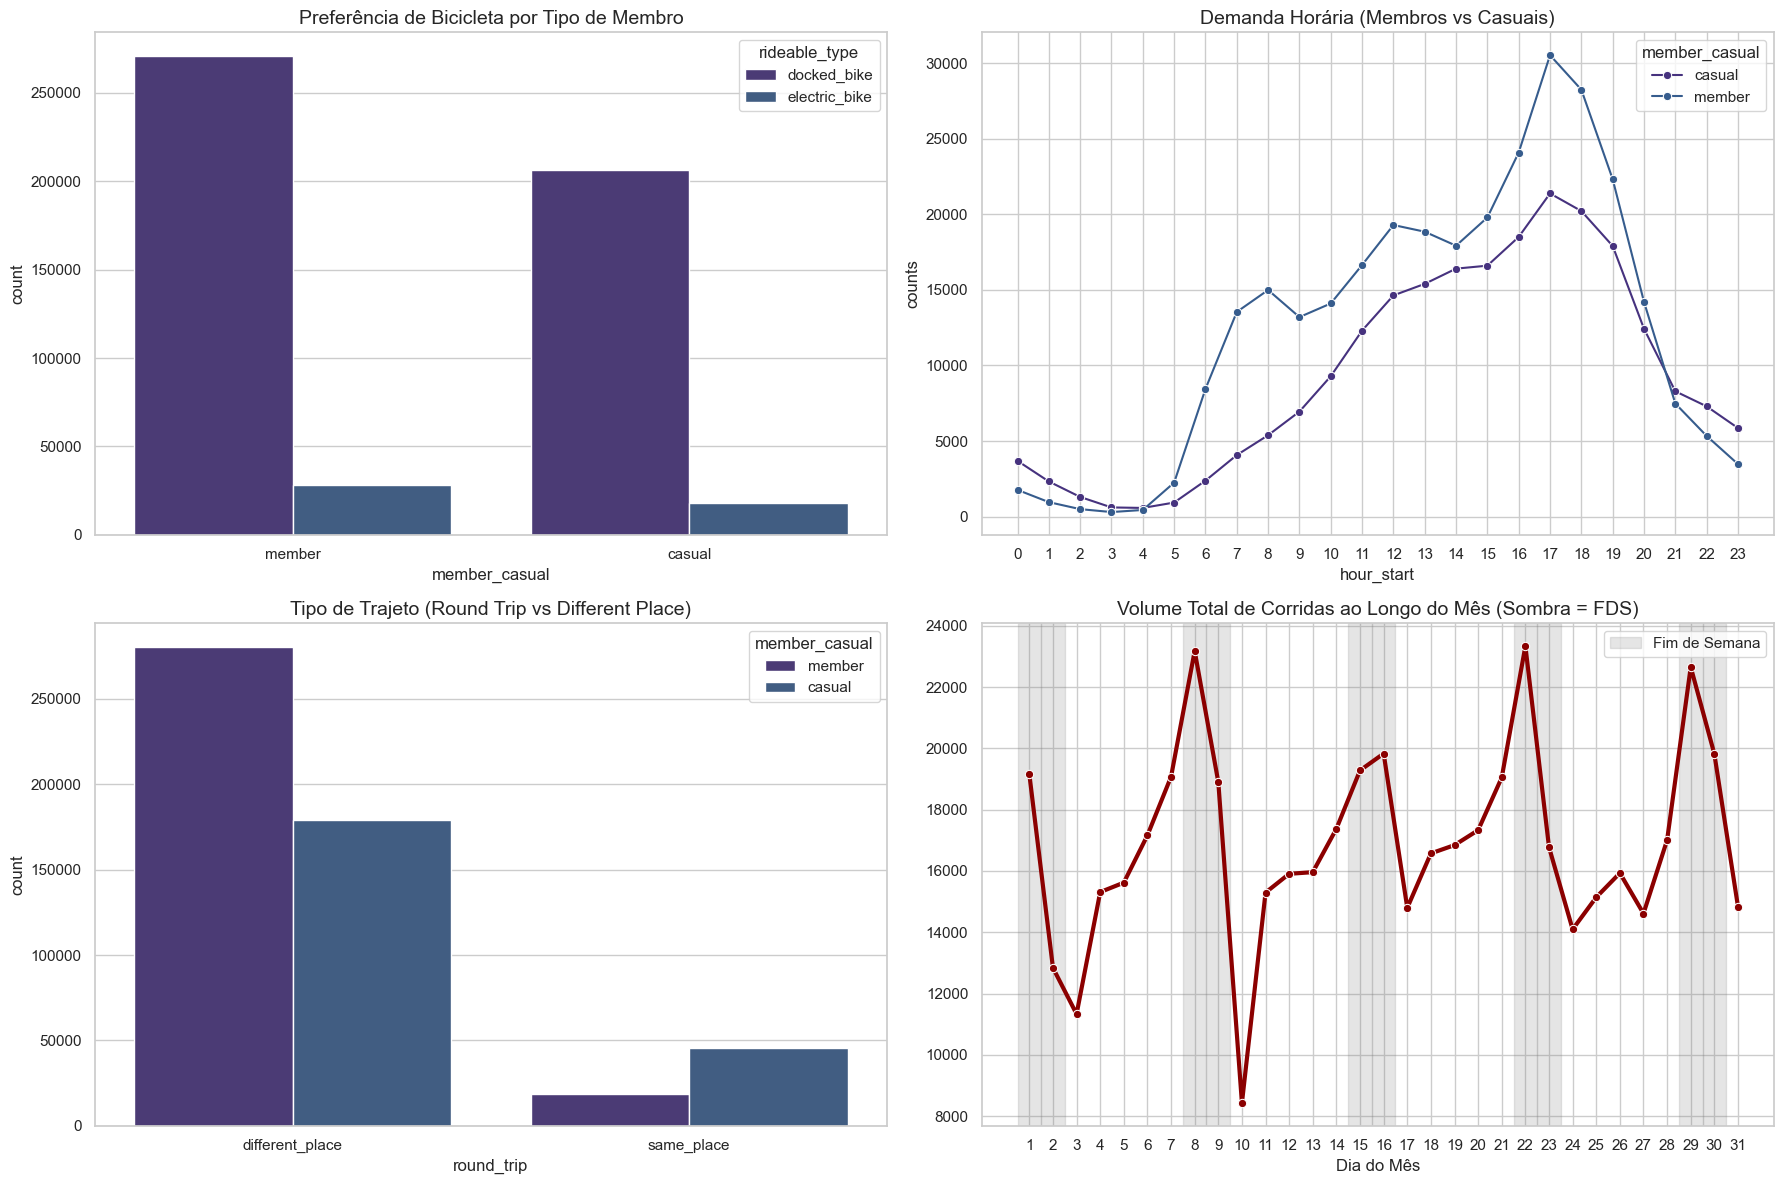

In [64]:
plot_distributions_and_volume(df)

Insights:
1) O maior uso de biciletas se dá pelo período da tarde/noite (15-19) de forma geral , no entanto existe um pico de uso no horário das 7-9 por usuário do tipo "member" , podemos induzir que eles usam para ir ao trabalho , por exemplo?
2) usuário "casual" usam mais a bicicleta em viagens que iniciam e terminam no mesmo local, diferente de usuários tipo "member" que majoritariamente usam para ir e voltar em locais diferentes
3) Quando analisamos dias do mês percebemos que existem picos de uso em fins de semana e baixas logo após os fins de semana

In [65]:
def plot_correlation_heatmap(df):
    """Mapa de calor para entender correlações."""
    plt.figure(figsize=(10, 8))
    cols = ['ride_duration_minutes', 'distance_km', 'hour_start', 'is_weekend', 'hour_end']
    corr = df[cols].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool)) # Máscara para ver só metade (opcional)
    
    sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0, fmt=".2f", linewidths=.5)
    plt.title('Heatmap de Correlação de Variáveis')
    plt.show()

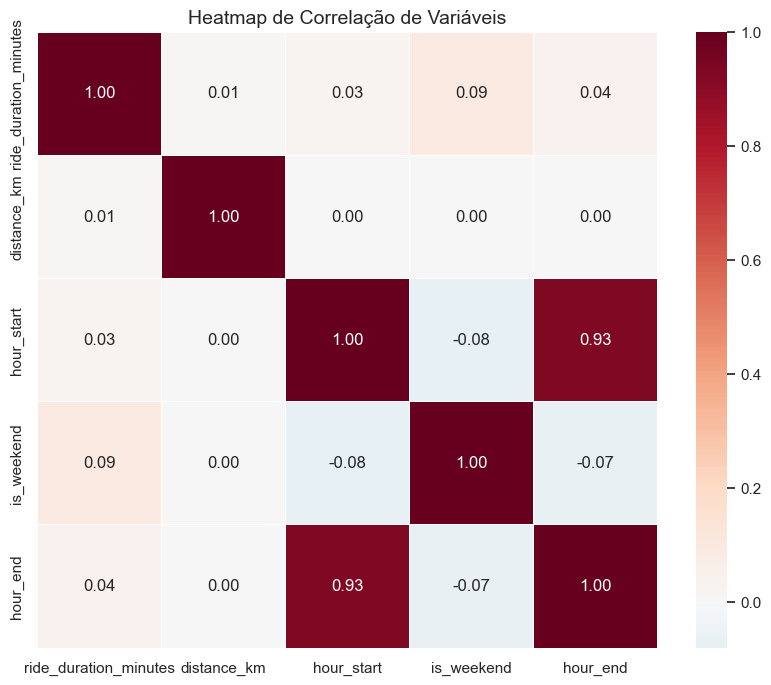

In [66]:
plot_correlation_heatmap(df)

In [67]:
def plot_performance_and_outliers_optimized(df):
    sns.set_theme(style="whitegrid")
    
    # Criamos a grade 2x2
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Média de KM por Membro (Posição: Superior Esquerdo)
    sns.barplot(data=df, x='member_casual', y='distance_km', 
                ax=axes[0, 0], estimator='mean', errorbar=None)
    axes[0, 0].set_title('Média de KM por Tipo de Membro')

    # 2. KM: Fim de Semana vs Dias Úteis (Posição: Superior Direito)
    sns.barplot(data=df, x='is_weekend', y='distance_km', hue='member_casual', 
                ax=axes[0, 1], errorbar=None)
    axes[0, 1].set_title('KM: Fim de Semana vs Dias Úteis')
    axes[0, 1].set_xticklabels(['Dia Útil', 'Fim de Semana'])

    # 3. Boxplot Distância (Posição: Inferior Esquerdo)
    sns.boxplot(data=df, x='member_casual', y='distance_km', ax=axes[1, 0], fliersize=1)
    axes[1, 0].set_title('Distribuição e Outliers de Distância')

    # 4. Boxplot Duração - Integrado na mesma figura (Posição: Inferior Direito)
    sns.boxplot(data=df, x='member_casual', y='ride_duration_minutes', 
                ax=axes[1, 1], palette='Set2', fliersize=1)
    axes[1, 1].set_title('Outliers: Duração da Corrida (Minutos)')

    plt.tight_layout()
    plt.show()

C:\Users\Luis\AppData\Local\Temp\ipykernel_22496\2667224227.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Dia Útil', 'Fim de Semana'])
C:\Users\Luis\AppData\Local\Temp\ipykernel_22496\2667224227.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='member_casual', y='ride_duration_minutes',


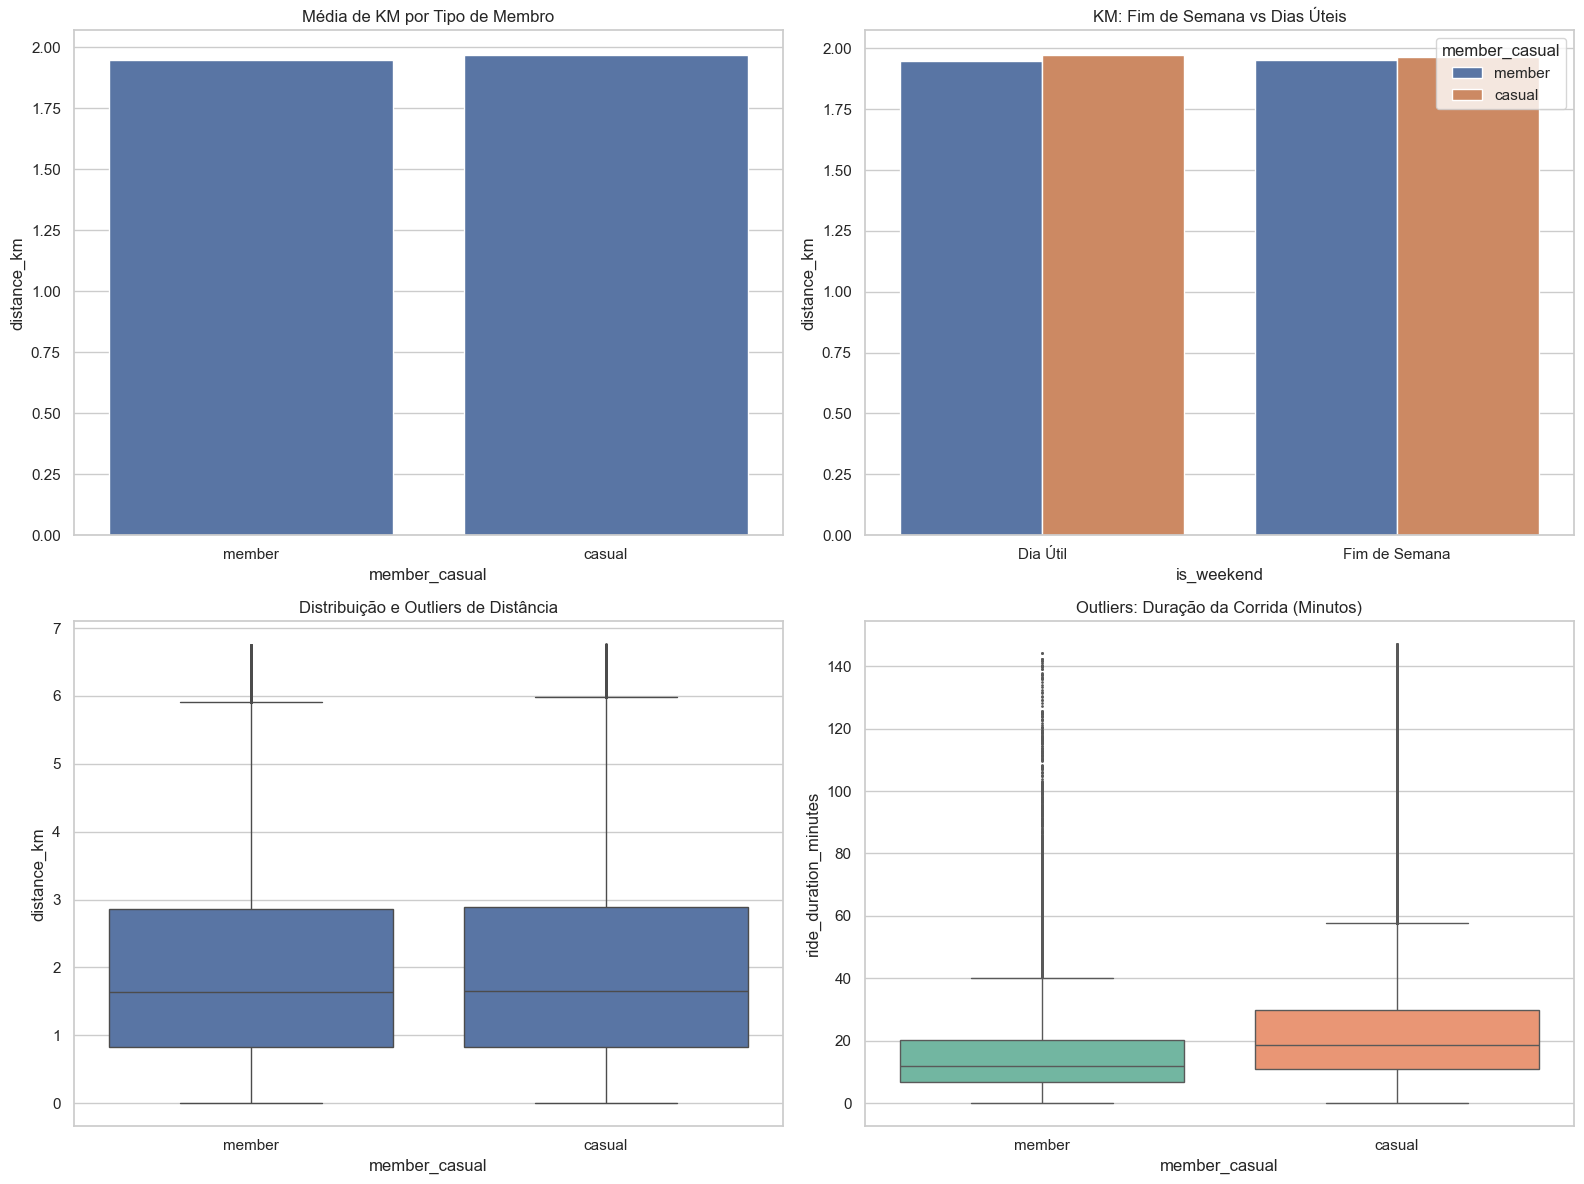

In [68]:
plot_performance_and_outliers_optimized(df)

## Análise das Estações

In [69]:
def analise_estacoes_completa(df):
    print("=== 🚉 ANÁLISE ESTRATÉGICA DE ESTAÇÕES ===")
    
    # Configuração global
    plt.rcParams['font.family'] = 'DejaVu Sans'
    paleta_padrao = 'mako' 

    # 1. Top 10 Estações de Início e Fim
    top_start = df['start_station_name'].value_counts().head(10)
    top_end = df['end_station_name'].value_counts().head(10)

    # 2. Rotas (Todas vs Apenas Diferentes)
    # Rota completa (pode incluir Início == Fim)
    df['route_all'] = df['start_station_name'] + " => " + df['end_station_name']
    top_routes_all = df['route_all'].value_counts().head(10)

    # Rota apenas diferentes
    rotas_diff_df = df[df['start_station_name'] != df['end_station_name']].copy()
    rotas_diff_df['route_diff'] = rotas_diff_df['start_station_name'] + " => " + rotas_diff_df['end_station_name']
    top_routes_diff = rotas_diff_df['route_diff'].value_counts().head(10)

    # 3. Análise de Fluxo (Saldo)
    starts = df['start_station_name'].value_counts()
    ends = df['end_station_name'].value_counts()
    flow = pd.DataFrame({'Saídas': starts, 'Chegadas': ends}).fillna(0)
    flow['Saldo'] = flow['Chegadas'] - flow['Saídas']
    
    mais_ganham = flow.sort_values(by='Saldo', ascending=False).head(5)
    mais_perdem = flow.sort_values(by='Saldo', ascending=True).head(5)
    balance_plot = pd.concat([mais_ganham, mais_perdem])

    # --- VISUALIZAÇÃO ---
    # Criamos um layout de 3 linhas e 2 colunas
    fig, axes = plt.subplots(3, 2, figsize=(22, 26))

    # Gráfico 1: Top Start Stations
    sns.barplot(y=top_start.index, x=top_start.values, ax=axes[0, 0], 
                hue=top_start.index, palette=paleta_padrao, legend=False)
    axes[0, 0].set_title('Top 10 Estações de Partida (Geral)')

    # Gráfico 2: Top End Stations
    sns.barplot(y=top_end.index, x=top_end.values, ax=axes[0, 1], 
                hue=top_end.index, palette=paleta_padrao, legend=False)
    axes[0, 1].set_title('Top 10 Estações de Chegada (Geral)')

    # Gráfico 3: Todas as Rotas (Incluindo as circulares X -> X)
    sns.barplot(y=top_routes_all.index, x=top_routes_all.values, ax=axes[1, 0], 
                hue=top_routes_all.index, palette='rocket', legend=False)
    axes[1, 0].set_title('Top 10 Rotas Gerais (Inclui Viagens Circulares)')

    # Gráfico 4: Rotas Filtradas (Apenas Origem != Destino)
    sns.barplot(y=top_routes_diff.index, x=top_routes_diff.values, ax=axes[1, 1], 
                hue=top_routes_diff.index, palette=paleta_padrao, legend=False)
    axes[1, 1].set_title('Top 10 Rotas (Apenas Estações Diferentes)')

    # Gráfico 5: Saldo de Bicicletas (Usando a primeira coluna da última linha)
    sns.barplot(y=balance_plot.index, x=balance_plot['Saldo'], ax=axes[2, 0], 
                hue=balance_plot.index, palette='coolwarm', legend=False)
    axes[2, 0].set_title('Saldo de Bikes (Top 5 Ganham vs Top 5 Perdem)')
    axes[2, 0].set_xlabel('Saldo Negativo = Esvaziando | Positivo = Acumulando')

    # Remove o último subgráfico vazio (axes[2, 1]) para o layout ficar limpo
    fig.delaxes(axes[2, 1])

    plt.tight_layout()
    plt.show()

    # Limpeza de memória
    # df.drop(columns=['route_all'], inplace=True)

=== 🚉 ANÁLISE ESTRATÉGICA DE ESTAÇÕES ===


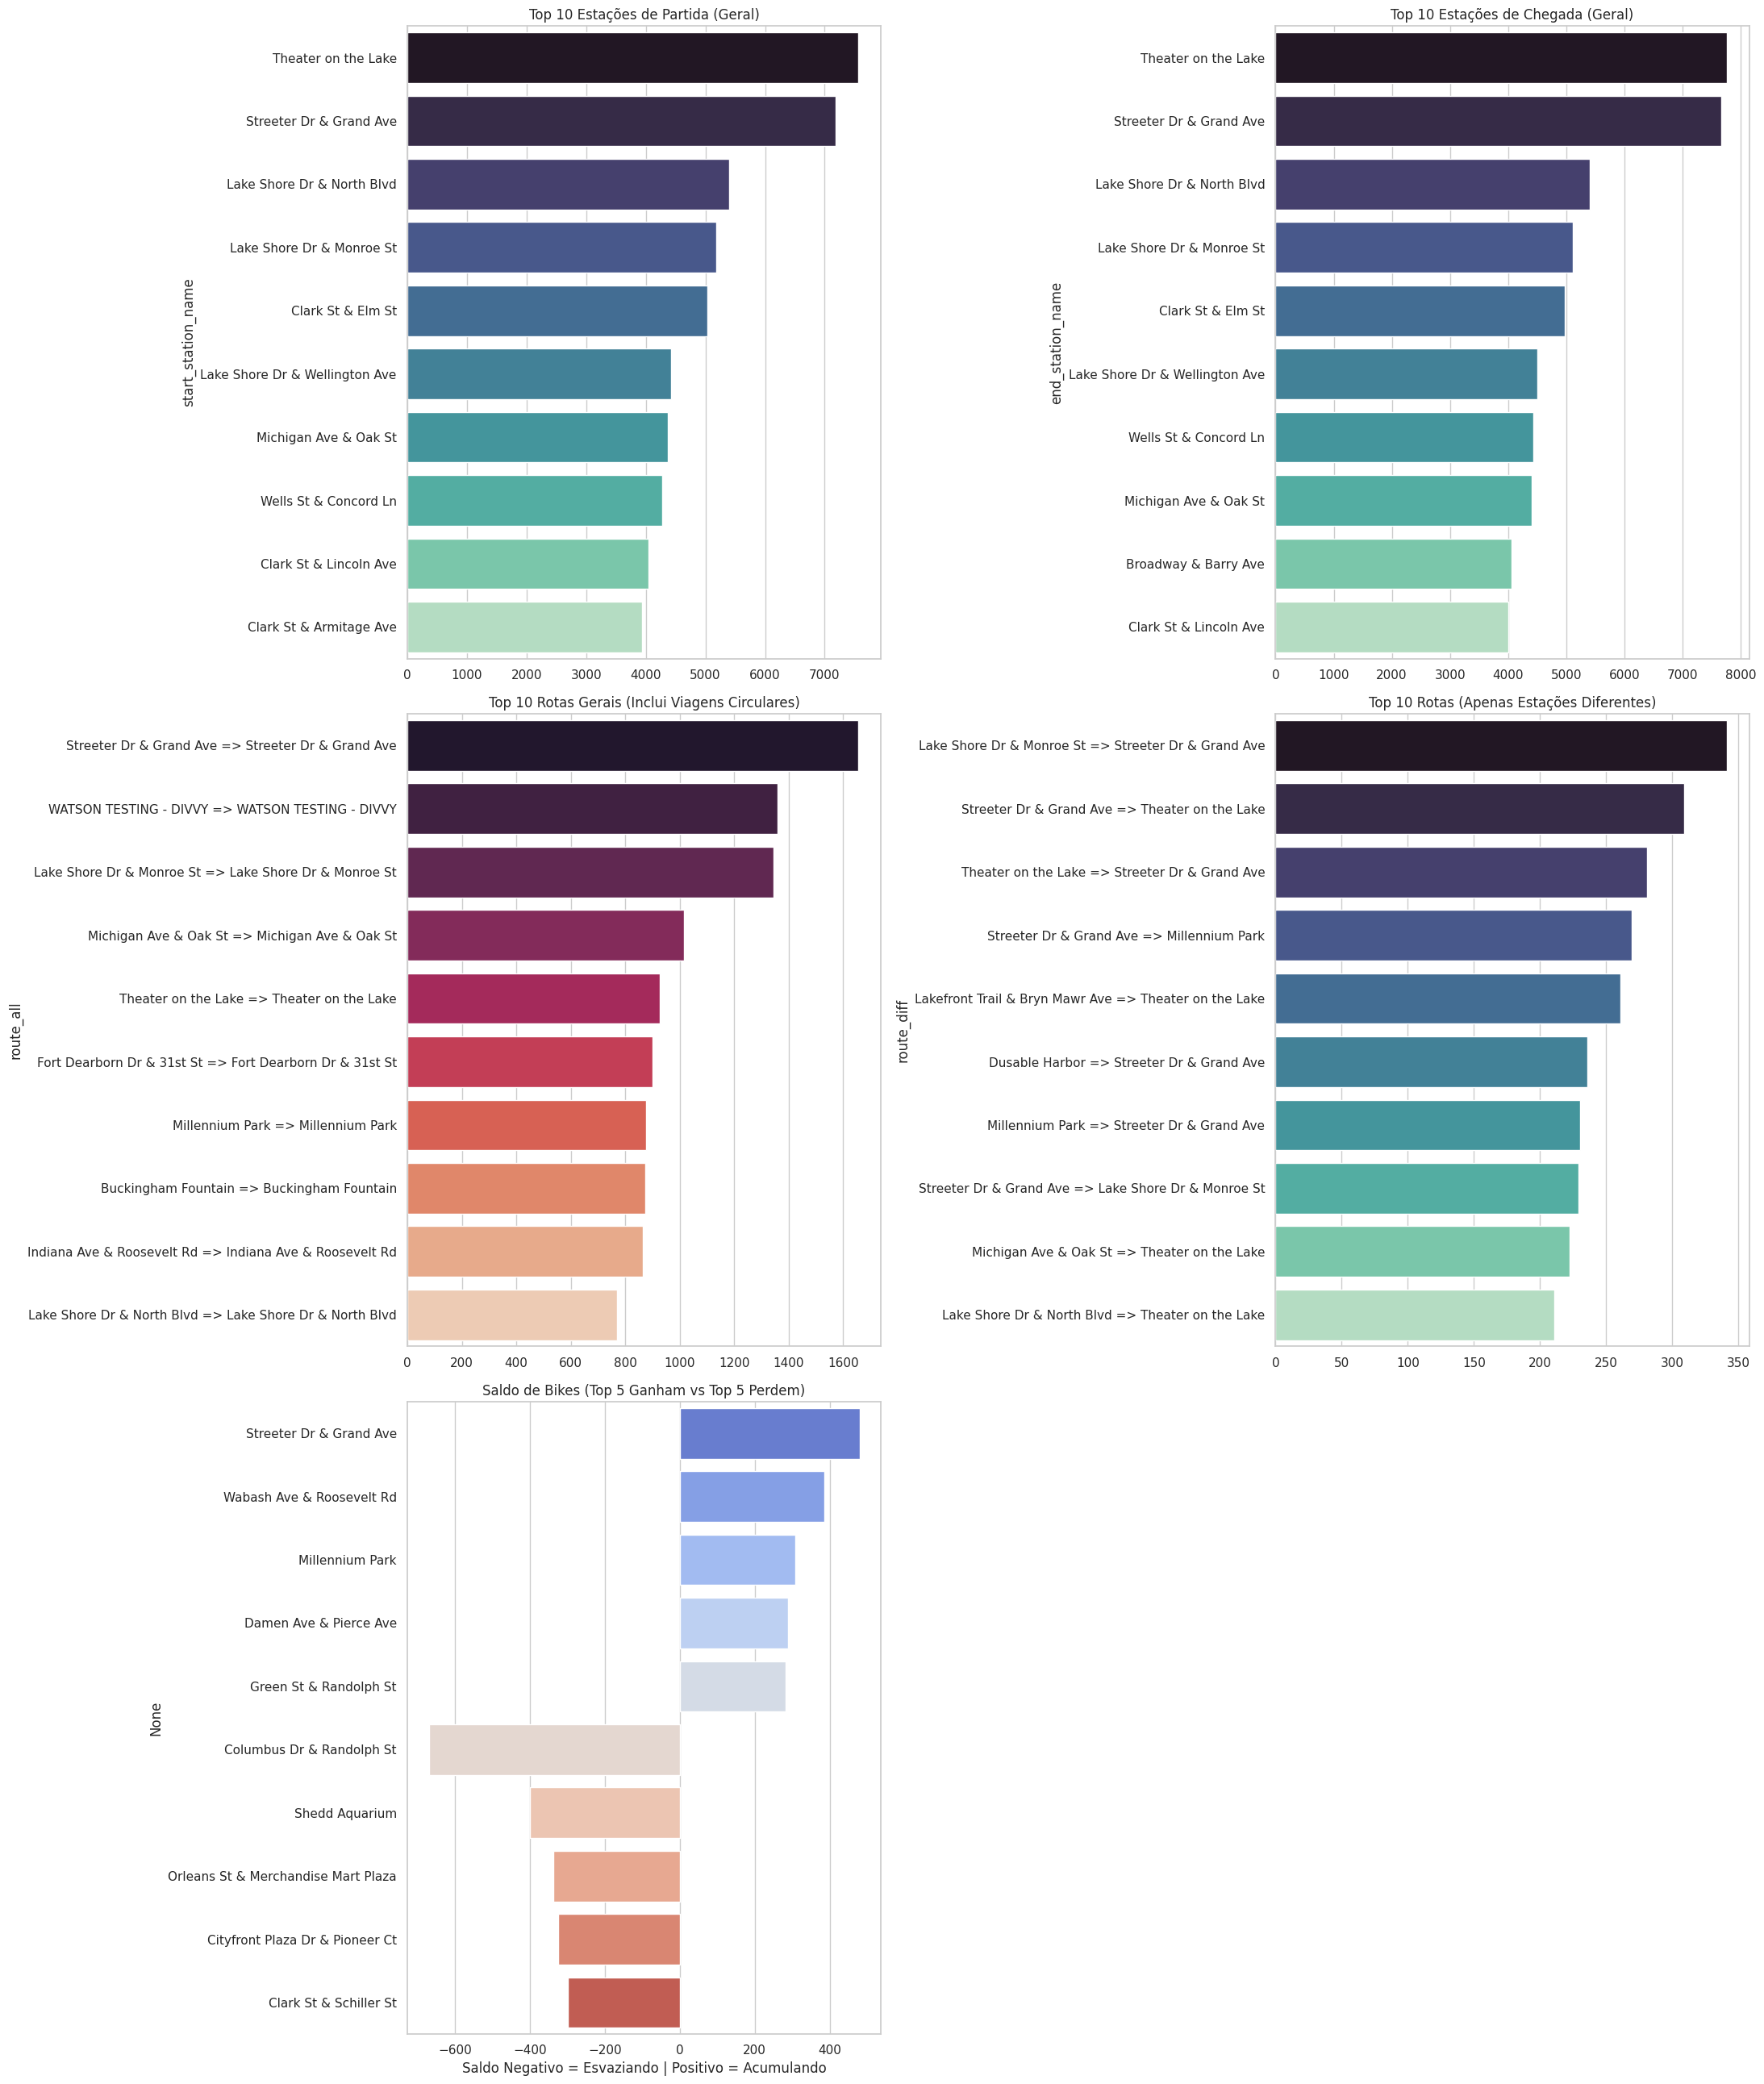

In [70]:
analise_estacoes_completa(df)

Insights:
1) As top 10 viagens mais feitas sempre saem de uma estação e retornam para a mesma estação. Isso pode trazer um questionamento acerca da disposição das estações ao redor da cidade: Será que as estações não estão bem localizadas/distribuídas de forma a forçar os usuários a irem e voltarem com a bicicleta por não ter estação para deixar as bicicletas? Ou o padrão de consumo indica apenas viagens rápidas para determinados lugares? O Mais correto aqui seria uma análise de persona dos consumidores.
2) Streeter Dr & Grand Ave tem recebido mais bicicletas e Columbus Dr & Randolph St tem "perdido" mais bicicletas, vale a pena uma análise desses bairros para entender qual a finalidade do uso das bicicletas lá? são bairros comerciais , residênciais ou turísticos ?

In [71]:
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,round_trip,ride_duration,ride_duration_minutes,week_day,is_weekend,hour_start,hour_end,distance_km,distance_m,route_all
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Lincoln Ave,141.0,41.932588,-87.636427,...,different_place,0 days 00:09:37,9.616667,Thursday,False,18,18,1.885153,1885.152542,Lake Shore Dr & Diversey Pkwy => Clark St & Li...


In [72]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'round_trip', 'ride_duration', 'ride_duration_minutes',
       'week_day', 'is_weekend', 'hour_start', 'hour_end', 'distance_km',
       'distance_m', 'route_all'],
      dtype='str')

In [73]:
def gerar_graficos_iterativos(df):
    PALETTE_START = [
    [0, 40, 80],    # Pouquíssimo
    [0, 80, 150],
    [0, 120, 200],
    [0, 180, 230],
    [0, 220, 255],
    [150, 255, 255] # Máximo (Brilha quase branco)
    ]
    
    PALETTE_END = [
        [60, 0, 60],    # Pouquíssimo
        [120, 0, 120],
        [180, 0, 100],
        [230, 50, 50],
        [255, 120, 0],
        [255, 255, 100] # Máximo (Amarelo neon)
    ]
    
    # 2. Configurando a Camada de Arcos (deck.gl)
    df_arc = df.dropna(subset=["start_lng", "start_lat","end_lng", "end_lat"])
    df_arc[["start_lng", "start_lat","end_lng", "end_lat"]] = df_arc[["start_lng", "start_lat","end_lng", "end_lat"]].astype(float)
    df_arc = df_arc[ df_arc["distance_m"] >= 100]
    df_arc = df_arc[ df_arc["round_trip"] == "different_place"]
    
    hexagon_layer_start = pdk.Layer(
        "HexagonLayer",
        df_arc.to_dict(orient="records"),
        get_position=["start_lng", "start_lat"],
        radius=500, # Tamanho do hexágono em metros
        elevation_scale=50,
        elevation_range=[0, 1000],
        extruded=True,
        color_range=PALETTE_START
    )
    
    hexagon_layer_end = pdk.Layer(
        "HexagonLayer",
        df_arc.to_dict(orient="records"),
        get_position=["end_lng", "end_lat"],
        radius=500, # Tamanho do hexágono em metros
        elevation_scale=50,
        elevation_range=[0, 1000],
        extruded=True,
        color_range=PALETTE_END
    )
    
    initial_lat_pos = float(df_arc["start_lat"].mean())
    init_lng_pos = float(df_arc["start_lng"].mean())
    
    # 3. Definindo a visão inicial do mapa
    view_state = pdk.ViewState(
        latitude=initial_lat_pos,
        longitude=init_lng_pos,
        zoom=9,
        pitch=75, # Inclinação para ver o efeito 3D
        bearing=0
    )
    
    # 4. Renderizando
    r = pdk.Deck(
        layers=[hexagon_layer_start],
        initial_view_state=view_state,
        tooltip={
            "html": "<b>Rota:</b> {route_all} <br/> "
                    "<b>Distância:</b> {distance_m} m <br/> " ,
            "style": {
                "backgroundColor": "steelblue",
                "color": "white"
            }
        }
    )
    r.to_html("../reports/mapa_interativo_start.html")
    
    r = pdk.Deck(
        layers=[hexagon_layer_end],
        initial_view_state=view_state,
        tooltip={
            "html": "<b>Rota:</b> {route_all} <br/> "
                    "<b>Distância:</b> {distance_m} m <br/> " ,
            "style": {
                "backgroundColor": "steelblue",
                "color": "white"
            }
        }
    )
    r.to_html("../reports/mapa_interativo_end.html")
    
    print("export finalizado")

In [74]:
gerar_graficos_iterativos(df)

export finalizado


In [80]:
def mapa_de_densidade(df , lat , lng):
    fig = px.density_map(df, 
                        lat = lat, 
                        lon = lng, 
                        radius=10,
                        center=dict(lat=df.start_lat.mean(), lon=df.start_lng.mean()), 
                        zoom=10,
                        mapbox_style="stamen-terrain")
    return fig

In [81]:
mapa = mapa_de_densidade(df,"start_lat","start_lng")
mapa.show()

TypeError: density_map() got an unexpected keyword argument 'mapbox_style'. Did you mean 'map_style'?